In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

In [17]:
patient_data = pd.read_csv('/Users/scarrillo/IdeaProjects/synthea/output/csv/patients.csv', usecols=['Id', 'GENDER'])
agedata_DataFrame = pd.read_csv('/Users/scarrillo/IdeaProjects/synthea/output/csv/patients.csv', usecols= ['Id', 'BIRTHDATE'])
conditions_data = pd.read_csv('/Users/scarrillo/IdeaProjects/synthea/output/csv/conditions.csv', usecols =['START', 'PATIENT', 'CODE', 'DESCRIPTION'])

condition_types = conditions_data[["PATIENT"]]
ageID_df = agedata_DataFrame[["Id"]]

condition_date = conditions_data[["START"]]
birth_dates = agedata_DataFrame[["BIRTHDATE"]]

# Pregnancy by patient
Number of pregnancies per person.
These codes include a multitude of different outcomes.

In [18]:
pregnancy_codes = [72892002, 47200007, 19169002, 35999006, 79586000, 156073000, 198992004, 398254007]
pregnancies = conditions_data[conditions_data.CODE.isin(pregnancy_codes)]

pregnancy_group = pregnancies.groupby('PATIENT', sort=True)
print(pregnancies)

             START                               PATIENT       CODE  \
9       1998-06-07  9d4348c2-c1cd-dd9e-fee0-398bfdc47754   72892002   
24      2000-10-01  9d4348c2-c1cd-dd9e-fee0-398bfdc47754   72892002   
38      2021-03-04  ed06c446-d29c-31b4-963d-be641291ba69   72892002   
40      2004-09-05  9d4348c2-c1cd-dd9e-fee0-398bfdc47754   72892002   
41      2004-09-05  9d4348c2-c1cd-dd9e-fee0-398bfdc47754   19169002   
...            ...                                   ...        ...   
152767  2016-06-06  29d8ea25-d11d-aaa9-4271-b75fb32c0b96   72892002   
152937  2003-02-08  9fcba264-371a-cfe2-a594-f9c8ec008bba   72892002   
152938  2003-08-23  9fcba264-371a-cfe2-a594-f9c8ec008bba  198992004   
152971  1981-01-06  743f0785-3094-0cda-a7e6-830b5e9cc4c6   19169002   
153001  2006-10-28  1d0ee4bf-b1f7-5153-1063-941f62c54211   19169002   

                           DESCRIPTION  
9                     Normal pregnancy  
24                    Normal pregnancy  
38                    No

## Grab year of pregnancy event and year of birth to get age of patient at time of pregnancy event

In [19]:
pregnancyYears = pregnancies['START'].array # from pregnancies <- conditions.csv
birthYears = birth_dates['BIRTHDATE'].array # from patients.csv
pregnancyIds = pregnancies['PATIENT'].array # from pregnancies <- conditions.csv
ageIDs = ageID_df['Id'].array

#truncate year from date string and cast to int for age calculation
for i, d in enumerate(pregnancyYears):
    pregnancyYears[i] = int(d[0:4])

for i, j in enumerate(birthYears):
    birthYears[i] = int(j[0:4])

# print(pregnancyYear)
# print(birthYears)

#grab index of ageIDs after matching to pregnancyIds, this is the index in birthyears array
#and take the value of the birthYears index and subtract it from the value of pregnancyYears index
ages = [0] * len(pregnancies) #create empty array of approximate size we need, to hold the ages.

p = 0 #index in patients.csv
c = 0 #index in conditions.csv

for i in ageIDs:
    for j in pregnancyIds:
         if i == j:
             ages[c] = pregnancyYears[c] - birthYears[p]
             c += 1
             #print(i)

    p += 1

#print(ages)



# Pregnancy totals by age
Totals by age

In [21]:
# count of age ranges
pregnancies_20 = 0
pregnancies_25 = 0
pregnancies_30 = 0
pregnancies_35 = 0
pregnancies_40 = 0
pregnancies_45 = 0
pregnancies_45_plus = 0

for a in ages:
    if a <= 20:
        pregnancies_20 += 1
    elif a <= 25:
        pregnancies_25 += 1
    elif a <= 30:
        pregnancies_30 += 1
    elif a <= 35:
        pregnancies_35 += 1
    elif a <= 40:
        pregnancies_40 += 1
    elif a<= 45:
        pregnancies_45 += 1
    else:
        pregnancies_45_plus += 1

print("[<=20]: " + str(pregnancies_20))
print("[<=25]: " + str(pregnancies_25))
print("[<=30]: " + str(pregnancies_30))
print("[<=35]: " + str(pregnancies_35))
print("[<=40]: " + str(pregnancies_40))
print("[<=45]: " + str(pregnancies_45))
print("[45+]: " + str(pregnancies_45_plus))

print("Pregnancies: ")
print(len(pregnancyIds))
print("Total number of patients (deceased + living): ")
print(len(ageIDs))


[<=20]: 832
[<=25]: 1633
[<=30]: 946
[<=35]: 781
[<=40]: 653
[<=45]: 863
[45+]: 888
Pregnancies: 
6596
Total number of patients (deceased + living): 
11945


Pregnancies by age bar graph

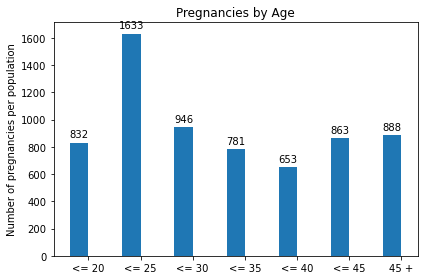

In [13]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

xAxisLabels = ['<= 20', '<= 25', '<= 30', '<= 35', '<= 40', '<= 45', '45 +']
ages_of_women = [pregnancies_20, pregnancies_25, pregnancies_30, pregnancies_35, pregnancies_40, pregnancies_45,pregnancies_45_plus]

x = np.arange(len(xAxisLabels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ages_of_women, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of pregnancies per population')
ax.set_title('Pregnancies by Age')
ax.set_xticks(x)
ax.set_xticklabels(xAxisLabels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
fig.tight_layout()
plt.show()

<ipython-input-14-dbf732e04888>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(pregnancy_types, pregnancy_numbers, color='bgrcmyk')


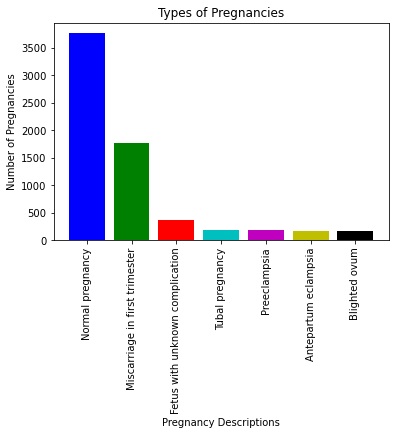

In [14]:
pregnancy_types = pregnancies['DESCRIPTION'].value_counts().keys()
pregnancy_numbers = pregnancies['DESCRIPTION'].value_counts()

plt.title("Types of Pregnancies")
plt.ylabel("Number of Pregnancies")
plt.xlabel("Pregnancy Descriptions")
plt.bar(pregnancy_types, pregnancy_numbers, color='bgrcmyk')
plt.xticks(rotation=90)
plt.show()
